In [1]:
import pandas as pd
import re
import random
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

def clean_text(text: str):
    if not isinstance(text, str):
        # raise TypeError("text must be a string")
        return ""

    # remove urls
    text = re.sub(r"http\S+", " ÿ±ÿßÿ®ÿ∑ ", text)

    # replace any digit with ÿ±ŸÇŸÖ
    text = re.sub(r"\d+", " ÿ±ŸÇŸÖ ", text)

    # set space before and after any punctuation
    text = re.sub(r"([^\w\s])", r" \1 ", text)

    # remove extra spaces
    text = re.sub(r"\s+", " ", text)

    words = word_tokenize(text)
    text = " ".join([ w for w in words if len(w) > 1 ] )

    return text.lower().strip()


[nltk_data] Downloading package punkt to /Users/izx_gamex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
nltk.download('punkt_tab')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/izx_gamex/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/izx_gamex/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

----------------------------------------------------------------


# Preprocess functions

In [4]:
import pandas as pd

# load the data of the comments
df=pd.read_csv("/Users/izx_gamex/Desktop/Tuwaiq/capston/df0_574cleaned.csv")




# Add an ID column to the dataframe
# df.insert(0, "Comment_ID", range(1, len(df) + 1))
# df["Comment_ID"]
# df.to_csv("df0_574cleaned.csv")

In [ ]:


# Define delimiters for splitting comments
delimiters = ["\n", "ÿå", ".",'"','(',')']

# Function to split text using multiple delimiters
import re
def split_comment(comment):
    if pd.isna(comment):  # Handle NaN values
        return []
    return [segment.strip() for segment in re.split("|".join(map(re.escape, delimiters)), comment) if segment.strip()]

# Apply the function to split comments and explode into separate rows
df_exploded = df.assign(Comments=df["Comments"].apply(split_comment)).explode("Comments")

df_exploded
# Function to further split comments by the first character if it is "Ÿà"
def split_by_waw(comment):
    words = comment.split()  # Split by space
    result = []
    temp = []
    
    for word in words:
        if word.startswith("Ÿà") and temp:
            result.append(" ".join(temp))  # Store previous chunk
            temp = [word]  # Start new chunk
        else:
            temp.append(word)
    
    if temp:  # Add the last chunk
        result.append(" ".join(temp))
    
    return result

# Apply the function and explode again
df_exploded["Comments"] = df_exploded["Comments"].apply(split_by_waw)
df = df_exploded.explode("Comments").reset_index(drop=True)

df

ÿ≥Ÿäÿ¶Ÿá ÿ¨ÿØÿß ÿ™ÿØŸÖÿ±ÿ™ ŸÜŸÅÿ≥Ÿäÿ© ŸàŸÑÿØŸä ÿ®ÿ≥ÿ®ÿ® ÿ≥Ÿàÿ° ÿ™ÿπÿßŸÖŸÑŸáŸÖ ŸÖÿπŸá ŸàÿßŸáŸÖÿßŸÑŸáŸÖ ŸÖÿßŸÅŸäŸá ÿßŸä ÿßŸáÿ™ŸÖÿßŸÖ ÿ®ÿßŸÑÿ∑ŸÅŸÑ ŸÉŸÑ ÿßÿ≥ÿ®Ÿàÿπ ÿßŸà ÿßÿ≥ÿ®ŸàÿπŸäŸÜ Ÿäÿ™ÿµŸÑŸàŸÜ ŸÅŸÇÿ∑ ŸäÿπŸÑŸÖŸàŸÜŸä ÿßŸÜŸá ŸÖÿµÿßÿ® ÿßŸà ŸÖÿ∂ÿ±Ÿàÿ® ÿßŸà ÿ∑ÿßŸäÿ≠ ÿßŸä ÿßÿ™ÿµÿßŸÑ ÿ´ÿßŸÜŸä ÿπŸÜ ÿßŸÑÿ∑ŸÅŸÑ ŸÖÿßŸÅŸä
ÿßÿ¨Ÿä ÿßÿ™ŸÉŸÑŸÖ ŸÖÿπÿßŸáŸÖ ŸÖÿßŸÅŸä ÿßŸä ÿ™ÿ¨ÿßŸàÿ® ÿßÿ≥ÿ£ŸÑ ÿπŸÜ ŸàŸÑÿØŸä ÿ±ÿØŸáŸÖ ŸÉŸÑŸáŸÖ ŸÅŸÇÿ∑" ÿßŸÑÿ≠ŸÖÿØŸÑŸÑŸá ŸÉŸàŸäÿ≥"
ŸàŸÑÿØŸä Ÿäÿ¥ÿ™ŸÉŸä ŸÖŸÜ ÿ∂ÿ±ÿ®ŸáŸÖ ŸÑŸá Ÿàÿ∂ÿ±ÿ® ÿßŸÑÿßÿ∑ŸÅÿßŸÑ ŸàÿπŸÇÿßÿ®ŸáŸÖ ŸäŸàŸÇŸÅŸàŸÜŸá ÿπŸÑŸâ ÿßŸÑÿ¨ÿØÿßÿ± ÿÆŸäÿ± ŸàŸäŸÜ ÿπÿßŸäÿ¥ŸäŸÜ ŸàŸäŸÜ ÿßÿ≥ÿßŸÑŸäÿ® ÿßŸÑÿ™ÿ±ÿ®ŸäŸá ŸàÿßŸÑÿ™ÿπÿßŸÖŸÑ ŸÖÿπ ÿßŸÑÿ∑ŸÅŸÑ ŸàÿßŸÑÿ™ÿ≠ŸÅŸäÿ≤ ÿµÿ±ÿßÿ≠Ÿá ŸÜÿØÿØÿØŸÖÿ™ ÿßÿ¥ÿØ ÿßŸÑŸÜÿØŸÖ ÿßŸÜŸä ÿØÿÆŸÑÿ™Ÿá ÿπŸÜÿØŸáŸÖ
ÿßŸÉÿ®ÿ± ŸáŸÖŸáŸÖ ŸÖÿ≠ÿ™ŸàŸâ ÿßŸÑÿ™ŸàÿßÿµŸÑ ÿßŸÑÿßÿ¨ÿ™ŸÖÿßÿπŸä ŸÅŸÇÿ∑ÿ∑ÿ∑


Comment_ID Time_Elapsed                     Comments  Likes  \
0               1           3m                   ŸÖÿ±ŸÉÿ≤ ŸÖŸÖÿ™ÿßÿ≤    0.0   
1               1           3m          ŸàŸÖŸÖŸäÿ≤ ÿ®ÿ™ŸÜŸàÿπ ÿßŸÜÿ¥ÿ∑ÿ™ŸáŸÖ    0.0   
2               1           3m                    ÿßŸÑÿ•ÿØÿßÿ±Ÿäÿßÿ™    0.0   
3               1           3m        ŸàÿßŸÑŸÖÿπŸÑŸÖÿßÿ™ ŸÉŸÑŸáŸÖ ÿ®ÿ¥Ÿàÿ¥ÿßÿ™    0.0   
4               1           3m  ŸàŸäŸáÿ®ŸÑ ÿ™ÿπÿßŸÖŸÑŸáŸÖ ŸÖÿπ ÿßŸÑÿßÿ∑ŸÅÿßŸÑüòª ‚Ä¶    0.0   
...           ...          ...                          ...    ...   
74412       11203           1y  ŸÖŸÖÿ™ÿßÿ≤ ŸÖÿßÿ¥ÿßÿ° ÿßŸÑŸÑŸá ÿ™ÿ®ÿßÿ±ŸÉ ÿßŸÑŸÑŸá    1.0   
74413       11204           6m                 ŸÅŸäŸá ÿßŸÇÿ≥ÿßÿ∑ !ÿü    0.0   
74414       11205           2y                    ÿ±ÿßŸäÿπ ÿ¨ŸÖŸäŸÑ    3.0   
74415       11206           2y          ŸÖÿß Ÿäÿ±ÿØŸàŸÜ ÿπŸÑŸâ ÿßŸÑŸáÿßÿ™ŸÅ    0.0   
74416       11207           2m                      üåπüåπüåπüåπüåπ ‚Ä¶    0.0   

                                                     url  
0      https://www.google.com/maps/place/%D9%85%D8%B1...  
1      https://www.google.com/maps/place/%D9%85%D8%B1...  
2      https://www.google.com/maps/place/%D9%85%D8%B1...  
3      https://www.google.com/maps/place/%D9%85%D8%B1...  
4      https://www.google.com/maps/place/%D9%85%D8%B1...  
...                                                  ...  
74412  https://www.google.com/maps/place/%D9%85%D8%AF...  
74413  https://www.google.com/maps/place/%D9%85%D8%AF...  
74414  https://www.google.com/maps/place/%D9%85%D8%AF...  
74415  https://www.google.com/maps/place/%D9%85%D8%AF...  
74416  https://www.google.com/maps/place/%D9%85%D8%AF...  

[74417 rows x 5 columns]

In [ ]:

# delete comments that contain english words
df['Comments'] = df['Comments'].astype(str)
df_filtered = df[~df['Comments'].str.contains(r'[A-Za-z]', regex=True)]
df = df_filtered

# Clean the text of the comments
df['Comments'] = df['Comments'].apply(clean_text)
df

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_18807/676240213.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comments'] = df['Comments'].apply(clean_text)


Comment_ID Time_Elapsed                     Comments  Likes  \
0               1           3m                   ŸÖÿ±ŸÉÿ≤ ŸÖŸÖÿ™ÿßÿ≤    0.0   
1               1           3m          ŸàŸÖŸÖŸäÿ≤ ÿ®ÿ™ŸÜŸàÿπ ÿßŸÜÿ¥ÿ∑ÿ™ŸáŸÖ    0.0   
2               1           3m                    ÿßŸÑÿ•ÿØÿßÿ±Ÿäÿßÿ™    0.0   
3               1           3m        ŸàÿßŸÑŸÖÿπŸÑŸÖÿßÿ™ ŸÉŸÑŸáŸÖ ÿ®ÿ¥Ÿàÿ¥ÿßÿ™    0.0   
4               1           3m     ŸàŸäŸáÿ®ŸÑ ÿ™ÿπÿßŸÖŸÑŸáŸÖ ŸÖÿπ ÿßŸÑÿßÿ∑ŸÅÿßŸÑ    0.0   
...           ...          ...                          ...    ...   
74412       11203           1y  ŸÖŸÖÿ™ÿßÿ≤ ŸÖÿßÿ¥ÿßÿ° ÿßŸÑŸÑŸá ÿ™ÿ®ÿßÿ±ŸÉ ÿßŸÑŸÑŸá    1.0   
74413       11204           6m                    ŸÅŸäŸá ÿßŸÇÿ≥ÿßÿ∑    0.0   
74414       11205           2y                    ÿ±ÿßŸäÿπ ÿ¨ŸÖŸäŸÑ    3.0   
74415       11206           2y          ŸÖÿß Ÿäÿ±ÿØŸàŸÜ ÿπŸÑŸâ ÿßŸÑŸáÿßÿ™ŸÅ    0.0   
74416       11207           2m                                 0.0   

                                                     url  
0      https://www.google.com/maps/place/%D9%85%D8%B1...  
1      https://www.google.com/maps/place/%D9%85%D8%B1...  
2      https://www.google.com/maps/place/%D9%85%D8%B1...  
3      https://www.google.com/maps/place/%D9%85%D8%B1...  
4      https://www.google.com/maps/place/%D9%85%D8%B1...  
...                                                  ...  
74412  https://www.google.com/maps/place/%D9%85%D8%AF...  
74413  https://www.google.com/maps/place/%D9%85%D8%AF...  
74414  https://www.google.com/maps/place/%D9%85%D8%AF...  
74415  https://www.google.com/maps/place/%D9%85%D8%AF...  
74416  https://www.google.com/maps/place/%D9%85%D8%AF...  

[74069 rows x 5 columns]

In [ ]:
import re

# Alternative function to detect if a string contains only emojis
def is_only_emoji(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & pictographs
        "\U0001F680-\U0001F6FF"  # Transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    
    text = text.strip()  # Remove leading/trailing spaces
    return all(emoji_pattern.match(char) for char in text) if text else False

# Function to check for whitespace-only comments
def is_only_whitespace(text):
    return text.strip() == ""  # Check if text is empty after stripping spaces

# Ensure column is string type
df["Comments"] = df["Comments"].astype(str)

# Remove whitespace-only and emoji-only comments
df_filtered = df[~df["Comments"].apply(is_only_whitespace)]  # Remove whitespace-only comments
df_filtered = df_filtered[~df_filtered["Comments"].apply(is_only_emoji)]  # Remove emoji-only comments

df =df_filtered
df

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_18807/3440085127.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Comments"] = df["Comments"].astype(str)


Comment_ID Time_Elapsed                             Comments  Likes  \
0               1           3m                           ŸÖÿ±ŸÉÿ≤ ŸÖŸÖÿ™ÿßÿ≤    0.0   
1               1           3m                  ŸàŸÖŸÖŸäÿ≤ ÿ®ÿ™ŸÜŸàÿπ ÿßŸÜÿ¥ÿ∑ÿ™ŸáŸÖ    0.0   
2               1           3m                            ÿßŸÑÿ•ÿØÿßÿ±Ÿäÿßÿ™    0.0   
3               1           3m                ŸàÿßŸÑŸÖÿπŸÑŸÖÿßÿ™ ŸÉŸÑŸáŸÖ ÿ®ÿ¥Ÿàÿ¥ÿßÿ™    0.0   
4               1           3m             ŸàŸäŸáÿ®ŸÑ ÿ™ÿπÿßŸÖŸÑŸáŸÖ ŸÖÿπ ÿßŸÑÿßÿ∑ŸÅÿßŸÑ    0.0   
...           ...          ...                                  ...    ...   
74410       11202           2y  ÿßÿ¥ŸÉÿ± ŸÖŸàÿ∏ŸÅÿßÿ™ ŸÖÿ±ŸÉÿ≤ ÿµÿ∫ÿßÿ±Ÿä ŸÑÿ™ÿπÿßŸàŸÜŸáŸÖ ŸÖÿπŸä   10.0   
74412       11203           1y          ŸÖŸÖÿ™ÿßÿ≤ ŸÖÿßÿ¥ÿßÿ° ÿßŸÑŸÑŸá ÿ™ÿ®ÿßÿ±ŸÉ ÿßŸÑŸÑŸá    1.0   
74413       11204           6m                            ŸÅŸäŸá ÿßŸÇÿ≥ÿßÿ∑    0.0   
74414       11205           2y                            ÿ±ÿßŸäÿπ ÿ¨ŸÖŸäŸÑ    3.0   
74415       11206           2y                  ŸÖÿß Ÿäÿ±ÿØŸàŸÜ ÿπŸÑŸâ ÿßŸÑŸáÿßÿ™ŸÅ    0.0   

                                                     url  
0      https://www.google.com/maps/place/%D9%85%D8%B1...  
1      https://www.google.com/maps/place/%D9%85%D8%B1...  
2      https://www.google.com/maps/place/%D9%85%D8%B1...  
3      https://www.google.com/maps/place/%D9%85%D8%B1...  
4      https://www.google.com/maps/place/%D9%85%D8%B1...  
...                                                  ...  
74410  https://www.google.com/maps/place/%D9%85%D8%AF...  
74412  https://www.google.com/maps/place/%D9%85%D8%AF...  
74413  https://www.google.com/maps/place/%D9%85%D8%AF...  
74414  https://www.google.com/maps/place/%D9%85%D8%AF...  
74415  https://www.google.com/maps/place/%D9%85%D8%AF...  

[73556 rows x 5 columns]

In [ ]:
import re
import string
import pandas as pd
import arabicstopwords.arabicstopwords as stp

# -----------------------------
# 1. Define Arabic Preprocessing Functions
# -----------------------------

def preprocess_arabic(text):
    """
    Preprocess Arabic text:
      - Remove diacritics (tashkeel)
      - Normalize characters (e.g., different forms of Alef to a standard form)
      - Remove elongation (limit repeated characters)
      - Remove English letters and digits
      - Remove punctuation and extra spaces
    """
    # Ensure text is a string
    text = str(text)
    
    # Remove diacritics (Arabic Tashkeel)
    # Unicode ranges: \u0617-\u061A and \u064B-\u0652
    tashkeel_pattern = r'[\u0617-\u061A\u064B-\u0652]'
    text = re.sub(tashkeel_pattern, '', text)
    
    # Normalize characters: map different forms of Alef to a standard 'ÿß'
    text = re.sub(r'[ÿ•ÿ£Ÿ±ÿ¢ÿß]', 'ÿß', text)
    text = re.sub(r'Ÿâ', 'Ÿä', text)
    text = re.sub(r'ÿ§', 'ÿ°', text)
    text = re.sub(r'ÿ¶', 'ÿ°', text)
    # Optionally, replace Taa Marbuta with Ha (or leave as is depending on your needs)
    text = re.sub(r'ÿ©', 'Ÿá', text)
    
    # Remove elongation: keep at most two consecutive occurrences of a character
    text = re.sub(r'(.)\1+', r'\1\1', text)
    
    # Remove English letters and digits
    text = re.sub(r'[A-Za-z0-9]+', '', text)
    
    # Remove punctuation (both English and common Arabic punctuation)
    # The string.punctuation covers English punctuation; add Arabic punctuation manually.
    punct_pattern = f"[{re.escape(string.punctuation)}ÿåÿü¬´¬ªÿõ‚Ä¶‚Äú‚Äù‚Äò‚Äô‚Äì‚Äî‚Ä¢]"
    text = re.sub(punct_pattern, ' ', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def tokenize_and_remove_stopwords(text):
    """
    Simple tokenization by splitting on whitespace and then remove Arabic stopwords.
    """
    # Tokenize by splitting on spaces
    tokens = text.split()
    
    stop_words = stp.stopwords_list()


# Define your additional stopwords
    extra_stopwords = [
       'ŸÖÿ±ŸÉÿ≤', 'ÿßÿ∑ŸÅÿßŸÑ', 'ÿßÿ∑ŸÅÿßŸÑŸÜÿß', 'ÿßŸÑÿßÿ∑ŸÅÿßŸÑ', 'ÿ±Ÿäÿßÿ∂', 'ÿßŸÜÿ¥ÿ∑Ÿá', 'ŸÖÿØÿ±ÿ≥Ÿá',
       'ÿßŸÑŸÑŸá', 'ÿπŸÑŸä', 'ŸÖŸÖÿ™ÿßÿ≤', 'ÿ±ÿßÿ¶ÿπ', 'ÿ¨ÿØÿß', 'ÿßŸÉÿ´ÿ±', 'ŸÖÿßÿ¥ÿßÿ°ÿßŸÑŸÑŸá',
        'ÿ¥ŸÉÿ±ÿß', 'ŸÜŸàÿ±Ÿá', 'ÿ®ŸÜÿ™Ÿä', 'ŸàŸÑÿØŸä', 'ÿßÿ®ŸÜŸä', 'ÿ®ŸÜÿ™', 'ŸàŸÑÿØ', 'ÿßŸÜÿß', 'ÿπŸÜÿØŸä', 'ÿπŸÜÿØŸáŸÖ','ŸàÿßŸÑŸÑŸá',
        'ÿßŸÑŸÖÿØÿ±ÿ≥Ÿá', 'ÿßŸÑŸÖÿØÿ±ÿ≥ÿ©','ÿßŸÑŸÑŸä','ÿ™ÿ®ÿßÿ±ŸÉ','Ÿäÿ≥ÿπÿØŸáŸÖ','ÿ™ŸÇŸàŸÑ','ÿßŸä','ŸÑŸÑÿ™ŸàÿßÿµŸÑ','ŸÖŸÖŸÉŸÜ'
      ]
    
    extended_stop_words = stop_words + extra_stopwords

    # Load Arabic stopwords as a set for fast lookup
    extended_stop_words = set(stp.stopwords_list())
    
    # Remove stopwords
    tokens_filtered = [token for token in tokens if token not in extended_stop_words]
    
    # Rejoin tokens into a processed string
    return ' '.join(tokens_filtered)

# -----------------------------
# 2. Load and Preprocess the Dataset
# -----------------------------



# Apply the preprocessing functions to the Comments column
df['Comments'] = df['Comments'].apply(preprocess_arabic)
df['Comments'] = df['Comments'].apply(tokenize_and_remove_stopwords)

# Optionally, remove rows with very short comments (length <= 5 characters)
df['length'] = df['Comments'].str.len()
df = df[df['length'] > 5].copy()
df.drop(columns='length', inplace=True)

df

Sample preprocessed comments:


Comment_ID Time_Elapsed                         Comments  Likes  \
0               1           3m                       ŸÖÿ±ŸÉÿ≤ ŸÖŸÖÿ™ÿßÿ≤    0.0   
1               1           3m              ŸàŸÖŸÖŸäÿ≤ ÿ®ÿ™ŸÜŸàÿπ ÿßŸÜÿ¥ÿ∑ÿ™ŸáŸÖ    0.0   
2               1           3m                        ÿßŸÑÿßÿØÿßÿ±Ÿäÿßÿ™    0.0   
3               1           3m                 ŸàÿßŸÑŸÖÿπŸÑŸÖÿßÿ™ ÿ®ÿ¥Ÿàÿ¥ÿßÿ™    0.0   
4               1           3m            ŸàŸäŸáÿ®ŸÑ ÿ™ÿπÿßŸÖŸÑŸáŸÖ ÿßŸÑÿßÿ∑ŸÅÿßŸÑ    0.0   
...           ...          ...                              ...    ...   
74409       11201           2y                        ÿ®ÿßÿ±ŸÉ ÿßŸÑŸÑŸá    7.0   
74410       11202           2y  ÿßÿ¥ŸÉÿ± ŸÖŸàÿ∏ŸÅÿßÿ™ ŸÖÿ±ŸÉÿ≤ ÿµÿ∫ÿßÿ±Ÿä ŸÑÿ™ÿπÿßŸàŸÜŸáŸÖ   10.0   
74412       11203           1y      ŸÖŸÖÿ™ÿßÿ≤ ŸÖÿßÿ¥ÿßÿ° ÿßŸÑŸÑŸá ÿ™ÿ®ÿßÿ±ŸÉ ÿßŸÑŸÑŸá    1.0   
74414       11205           2y                        ÿ±ÿßŸäÿπ ÿ¨ŸÖŸäŸÑ    3.0   
74415       11206           2y                     Ÿäÿ±ÿØŸàŸÜ ÿßŸÑŸáÿßÿ™ŸÅ    0.0   

                                                     url  
0      https://www.google.com/maps/place/%D9%85%D8%B1...  
1      https://www.google.com/maps/place/%D9%85%D8%B1...  
2      https://www.google.com/maps/place/%D9%85%D8%B1...  
3      https://www.google.com/maps/place/%D9%85%D8%B1...  
4      https://www.google.com/maps/place/%D9%85%D8%B1...  
...                                                  ...  
74409  https://www.google.com/maps/place/%D9%85%D8%AF...  
74410  https://www.google.com/maps/place/%D9%85%D8%AF...  
74412  https://www.google.com/maps/place/%D9%85%D8%AF...  
74414  https://www.google.com/maps/place/%D9%85%D8%AF...  
74415  https://www.google.com/maps/place/%D9%85%D8%AF...  

[67171 rows x 5 columns]

In [ ]:
# take a sample from the data 
df = df.sample(frac=1, random_state=101)

In [8]:
df['Comments_len'] = df['Comments'].apply(len)

<Axes: xlabel='Comments_len', ylabel='Count'>

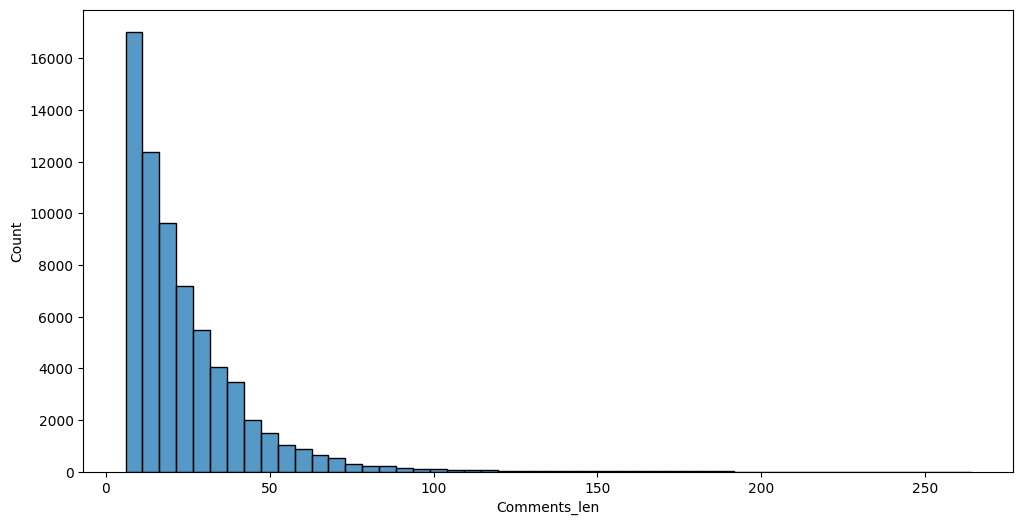

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Comments_len'], bins=50)

In [10]:
df.head(2)

Comment_ID Time_Elapsed  \
12780        1775           1y   
877            93           5y   

                                                Comments  Likes  \
12780  ŸàŸÖŸÉÿ™ŸàŸÖ ÿßŸÑÿπÿßŸÖŸÑÿßÿ™ ÿ¨ŸàÿßŸÑÿ™ŸáŸÖ ÿ®ÿ¥ŸÉŸÑ ŸÉÿ®Ÿäÿ± ÿ≠ÿ™Ÿä ÿ≠ÿ≥Ÿàÿß ÿßŸÜŸà...    5.0   
877                                          ŸÖÿØÿ±ÿ≥Ÿá ÿ±ÿßÿ°ÿπŸá    2.0   

                                                     url  Comments_len  
12780  https://www.google.com/maps/place/%D9%85%D8%B1...            52  
877    https://www.google.com/maps/place/%D9%85%D8%B1...            11

In [11]:
df=df[df['Comments_len']<100]

In [12]:
print(df.shape)

(66793, 6)


## Embedding


In [ ]:
from sentence_transformers import SentenceTransformer

model_id = "aubmindlab/bert-base-arabertv02"


embedding_model = SentenceTransformer(model_id, device="cpu")

No sentence-transformers model found with name aubmindlab/bert-base-arabertv02. Creating a new one with mean pooling.


In [14]:
Comments_embeddings = embedding_model.encode(df['Comments'].values, show_progress_bar=True)

Batches:   0%|          | 0/2088 [00:00<?, ?it/s]

In [15]:
Comments_embeddings.shape

(66793, 768)

## UMAP

In [16]:
from umap import UMAP

umap_model = UMAP(
    n_components=10,  # Keep more topic structure
    n_neighbors=10,  # Avoid too much merging
    min_dist=0.05,  # Allow some distance between clusters
    metric='cosine'
)


## Clustering

In [17]:
from hdbscan import HDBSCAN

# A higher min_cluster_size will generate fewer topics
# A lower min_cluster_size will generate more topics.
import hdbscan

hdbscan_model = hdbscan.HDBSCAN(
    min_cluster_size=100,
    min_samples=2,
    metric='euclidean',  # Fix: Change from 'cosine' to 'euclidean'
    cluster_selection_method='eom',
    prediction_data=True
)


## Vectorizer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import arabicstopwords.arabicstopwords as stp

stop_words = stp.stopwords_list()

vectorizer_model = CountVectorizer(
    min_df=5,  # Allow words appearing in at least 2 documents
    max_df=0.9,  # Reduce word removal from frequent words
    stop_words=stop_words,
    ngram_range=(1, 3)
)


## Topic Representer

In [19]:
from bertopic.representation import KeyBERTInspired

keybert_model = KeyBERTInspired()

representation_model = {
    "KeyBERT": keybert_model
}

## Start

In [ ]:
from bertopic import BERTopic
from sklearn.cluster import KMeans


# Create a KMeans clustering model (specify the number of topics)
kmeans_model = KMeans(n_clusters=80, random_state=101)

topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,          
    hdbscan_model=hdbscan_model,     
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    top_n_words=10,
    verbose=True
)

# Fit the model using your data and precomputed embeddings
topics, probs = topic_model.fit_transform(
    df['Comments'].values,
    Comments_embeddings
)





2025-03-18 10:13:02,200 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2025-03-18 10:13:28,630 - BERTopic - Dimensionality - Completed ‚úì
2025-03-18 10:13:28,632 - BERTopic - Cluster - Start clustering the reduced embeddings
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)

In [21]:
df['topic'] = topics
df['prob'] = probs

In [22]:
topic_model_cvs=topic_model.get_topic_info()

In [24]:
topic_model.get_topic_info()

Topic  Count                                      Name  \
0       -1  36010               -1_ÿ®ŸÜÿ™Ÿä_ÿßŸÑÿßÿ∑ŸÅÿßŸÑ_ÿßŸÑŸÑŸá_ÿßŸÑŸÖÿ±ŸÉÿ≤   
1        0   1589                   0_ÿ¥ŸÉÿ±ÿß_ÿßŸÑÿ¥ŸÉÿ±_ÿßÿ¥ŸÉÿ±ŸáŸÖ_ÿ¥ŸÉÿ±   
2        1   1543       1_ÿßŸÑŸÖÿπŸÑŸÖÿßÿ™_ŸàŸÖÿπŸÑŸÖÿßÿ™_ÿ±ÿßÿ°ÿπÿßÿ™_ŸàÿßŸÑŸÖÿπŸÑŸÖÿßÿ™   
3        2   1369                          2_ŸÖŸà_ÿßÿ∞ÿß_ÿ¥Ÿä_ÿ®ŸÜÿ™Ÿä   
4        3   1310        3_ŸàÿßÿÆÿµ_ÿ®ÿßŸÑÿ¥ŸÉÿ±_ÿßŸÑÿßÿ≥ÿ™ÿßÿ∞Ÿá_ŸàÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ±   
..     ...    ...                                       ...   
107    106    102   106_ÿ±ÿßÿ°ÿπŸá ÿ≠ÿ∂ÿßŸÜŸá_ÿ≠ÿ∂ÿßŸÜŸá ÿ±ÿßÿ°ÿπŸá_ÿ≠ÿ∂ÿßŸÜŸá_ÿ±ÿßÿ°ÿπŸá   
108    107    102  107_ÿßŸÑÿπÿßŸÅŸäŸá_Ÿäÿπÿ∑ŸäŸÉŸÖ ÿßŸÑÿπÿßŸÅŸäŸá_Ÿäÿπÿ∑ŸäŸÉŸÖ_Ÿäÿπÿ∑ŸäŸáŸÖ   
109    108    101   108_ÿßŸÑŸÖÿπŸÑŸÖÿßÿ™_ÿßŸÑÿπÿßŸÖŸÑÿßÿ™_ÿßŸÑÿπÿßŸÖŸÑŸäŸÜ_ÿßŸÑŸÖÿπŸÑŸÖŸäŸÜ   
110    109    101        109_Ÿàÿ≠ŸÜŸàŸÜŸäŸÜ_ŸÖÿ±Ÿäÿ≠ŸäŸÜ_ŸÖÿßÿØŸäŸäŸÜ_ÿßŸÑÿπÿßŸÖŸÑŸäŸÜ   
111    110    100              110_ÿßŸÑÿ≠ÿ±ŸàŸÅ_Ÿàÿ™ÿπŸÑŸÖ_ÿßŸÑÿßÿ≠ÿ±ŸÅ_ÿ≠ÿ±ŸàŸÅ   

                                        Representation  \
0    [ÿ®ŸÜÿ™Ÿä, ÿßŸÑÿßÿ∑ŸÅÿßŸÑ, ÿßŸÑŸÑŸá, ÿßŸÑŸÖÿ±ŸÉÿ≤, ÿ±ÿßÿ°ÿπŸá, ÿßŸÜÿß, ŸÖÿØÿ±ÿ≥...   
1    [ÿ¥ŸÉÿ±ÿß, ÿßŸÑÿ¥ŸÉÿ±, ÿßÿ¥ŸÉÿ±ŸáŸÖ, ÿ¥ŸÉÿ±, ÿ¨ÿ≤ŸäŸÑ, ÿ¨ÿ≤ŸäŸÑ ÿßŸÑÿ¥ŸÉÿ±, ÿß...   
2    [ÿßŸÑŸÖÿπŸÑŸÖÿßÿ™, ŸàŸÖÿπŸÑŸÖÿßÿ™, ÿ±ÿßÿ°ÿπÿßÿ™, ŸàÿßŸÑŸÖÿπŸÑŸÖÿßÿ™, ŸÑÿ∑ŸäŸÅÿßÿ™,...   
3    [ŸÖŸà, ÿßÿ∞ÿß, ÿ¥Ÿä, ÿ®ŸÜÿ™Ÿä, ÿßŸä, ÿßŸà, ÿπÿ¥ÿßŸÜ, ŸäÿπŸÜŸä, ÿßŸÑŸä, ÿßŸàŸÑ]   
4    [ŸàÿßÿÆÿµ, ÿ®ÿßŸÑÿ¥ŸÉÿ±, ÿßŸÑÿßÿ≥ÿ™ÿßÿ∞Ÿá, ŸàÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ±, ÿßÿ¥ŸÉÿ±, ÿßÿ≥...   
..                                                 ...   
107  [ÿ±ÿßÿ°ÿπŸá ÿ≠ÿ∂ÿßŸÜŸá, ÿ≠ÿ∂ÿßŸÜŸá ÿ±ÿßÿ°ÿπŸá, ÿ≠ÿ∂ÿßŸÜŸá, ÿ±ÿßÿ°ÿπŸá, ÿ≠ÿ∂ÿßŸÜŸá...   
108  [ÿßŸÑÿπÿßŸÅŸäŸá, Ÿäÿπÿ∑ŸäŸÉŸÖ ÿßŸÑÿπÿßŸÅŸäŸá, Ÿäÿπÿ∑ŸäŸÉŸÖ, Ÿäÿπÿ∑ŸäŸáŸÖ, Ÿäÿπÿ∑Ÿä...   
109  [ÿßŸÑŸÖÿπŸÑŸÖÿßÿ™, ÿßŸÑÿπÿßŸÖŸÑÿßÿ™, ÿßŸÑÿπÿßŸÖŸÑŸäŸÜ, ÿßŸÑŸÖÿπŸÑŸÖŸäŸÜ, ÿßŸÑÿßŸáÿß...   
110  [Ÿàÿ≠ŸÜŸàŸÜŸäŸÜ, ŸÖÿ±Ÿäÿ≠ŸäŸÜ, ŸÖÿßÿØŸäŸäŸÜ, ÿßŸÑÿπÿßŸÖŸÑŸäŸÜ, ŸÖÿ™ÿÆÿµÿµŸäŸÜ, Ÿà...   
111  [ÿßŸÑÿ≠ÿ±ŸàŸÅ, Ÿàÿ™ÿπŸÑŸÖ, ÿßŸÑÿßÿ≠ÿ±ŸÅ, ÿ≠ÿ±ŸàŸÅ, ŸÉŸÑŸÖÿßÿ™, Ÿàÿ™ÿπŸÑŸäŸÖ, ÿ™...   

                                               KeyBERT  \
0    [ÿµÿ±ÿßÿ≠Ÿá, ÿ®ÿµÿ±ÿßÿ≠Ÿá, ÿßÿ≥ÿ™ÿßÿ∞Ÿá, ÿ≠ÿ∂ÿßŸÜŸá, ŸÖÿ±ÿ±Ÿá, ÿßŸÑŸÖÿØÿ±ÿ≥Ÿá, ...   
1    [ÿ¥ŸÉÿ±ÿß ÿ¨ÿ≤ŸäŸÑÿß, ÿ¥ŸÉÿ±ÿß ÿ¨ŸÖŸäÿπÿß, Ÿàÿ¥ŸÉÿ±ÿß, ÿ¥ŸÉÿ±ÿß, ÿ¥ŸÉÿ±ÿß ÿßŸÑŸÇ...   
2    [ŸàŸÖÿπŸÑŸÖÿßÿ™, ŸÑŸÖÿπŸÑŸÖÿßÿ™, ÿßŸÑŸÖÿπŸÑŸÖÿßÿ™ ÿßÿ¥ŸÉÿ±, ŸÖÿπŸÑŸÖÿßÿ™ŸáŸÖ, ÿßŸÑ...   
3    [ÿßŸä ÿ¥Ÿä, ÿßÿ¥ŸàŸÅ, ÿ™ÿ®Ÿä, ŸÖÿßÿ±ÿßÿ≠, ŸÖÿßŸÅŸäŸá, ÿ™ÿ±Ÿàÿ≠, ÿßÿ±Ÿàÿ≠, ÿß...   
4    [ŸàÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ±, ŸàÿßÿÆÿµ ÿ®ÿßŸÑÿ∞ŸÉÿ±, ÿßÿ¥ŸÉÿ± ÿßŸÑÿßÿ≥ÿ™ÿßÿ∞Ÿá, ÿ≠ÿßÿ®Ÿá...   
..                                                 ...   
107  [ÿ≠ÿ∂ÿßŸÜŸá ÿ±ÿßÿ°ÿπŸá, ÿ±ÿßÿ°ÿπŸá ÿ≠ÿ∂ÿßŸÜŸá, ÿ≠ÿ∂ÿßŸÜŸá, ÿ±ÿßÿ°ÿπŸá, Ÿàÿ≠ÿ∂ÿßŸÜ...   
108  [ÿßŸÑŸÑŸá Ÿäÿπÿ∑ŸäŸáŸÖ ÿßŸÑÿπÿßŸÅŸäŸá, ÿßŸÑŸÑŸá Ÿäÿπÿ∑ŸäŸÉŸÖ ÿßŸÑÿπÿßŸÅŸäŸá, Ÿäÿπÿ∑...   
109  [ÿßŸÑŸÖÿπŸÑŸÖÿßÿ™, ÿßŸÑŸÖÿπŸÑŸÖŸäŸÜ, ÿßŸÑÿπÿßŸÖŸÑŸäŸÜ, ÿßŸÑÿßŸáÿßŸÑŸä, ÿßŸÑÿ™ÿØÿ±Ÿä...   
110  [Ÿàÿ≠ŸÜŸàŸÜŸäŸÜ, Ÿàÿ≠ÿ±ÿµŸäŸÜ, Ÿàÿ™ÿπŸÑŸäŸÖŸä, ŸÖÿßÿØŸäŸäŸÜ, ÿ≠ŸÜŸàŸÜŸäŸÜ, ŸÉŸàŸä...   
111  [ÿßŸÑÿ≠ÿ±ŸàŸÅ, ÿ≠ÿ±ŸàŸÅ, ÿßŸÑÿßÿ≠ÿ±ŸÅ, ÿ®ÿßŸÑŸÜÿ∑ŸÇ, ÿßŸÑÿßÿ±ŸÇÿßŸÖ, Ÿàÿ™ÿπŸÑŸÖ,...   

                                   Representative_Docs  
0    [ÿßÿ¥ŸÉÿ± ŸÖÿπŸÑŸÖŸá ÿßŸÑÿ≠ÿ∂ÿßŸÜŸá ŸÅÿπŸÑÿß, Ÿàÿ∫Ÿäÿ±Ÿà ÿßŸÑŸÖÿπŸÑŸÖÿßÿ™ ÿ¨ÿØ ŸÉÿß...  
1                [ÿ¥ŸÉÿ±ÿß ÿµÿßÿ®ÿ±ŸäŸÜ, ÿ¥ŸÉÿ±ÿß ÿßŸÑŸÉŸÖ, ÿ¥ŸÉÿ±ÿß ŸÑÿ∞ŸàŸÇŸáŸÖ]  
2     [ŸàŸÖÿπŸÑŸÖÿßÿ™ ÿ±ÿßÿ°ÿπÿßÿ™, ŸàŸÖÿπŸÑŸÖÿßÿ™ ÿ±ÿßÿ°ÿπÿßÿ™, ŸàŸÖÿπŸÑŸÖÿßÿ™ ÿ±ÿßÿ°ÿπÿßÿ™]  
3    [ŸàÿßŸáŸÖ ÿ¥Ÿä ÿßŸÑÿ±ÿ≥ŸàŸÖ ÿ™ŸÜÿØŸÅÿπ ÿßÿ∞ÿß ÿ™ÿßÿÆÿ±ÿ™ ÿßŸÑÿßŸÖ ÿßÿ≥ÿ®Ÿàÿπ ÿ™ÿ∑ÿ±...  
4    [ŸàÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ± ÿßŸÑŸÖÿπŸÑŸÖŸá ŸÜŸàÿ±Ÿá ÿßŸÑÿπÿ±ÿ¨ÿßŸÜŸä, ŸàÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉ...  
..                                                 ...  
107            [ÿ≠ÿ∂ÿßŸÜŸá ÿ±ÿßÿ°ÿπŸá, ÿ≠ÿ∂ÿßŸÜŸá ÿ±ÿßÿ°ÿπŸá, ÿ≠ÿ∂ÿßŸÜŸá ÿ±ÿßÿ°ÿπŸá]  
108  [ÿßŸÑŸÑŸá Ÿäÿπÿ∑ŸäŸÉŸÖ ÿßŸÑÿπÿßŸÅŸäŸá ÿ¨ŸáŸàÿØŸÉŸÖ ÿßŸÑÿ±ÿßÿ°ÿπŸá ÿ™ÿ®ÿ∞ŸÑŸàŸÜŸáÿß ÿ±...  
109                     [ÿßŸÑŸÖÿπŸÑŸÖÿßÿ™, ÿßŸÑŸÖÿπŸÑŸÖÿßÿ™, ÿßŸÑŸÖÿπŸÑŸÖÿßÿ™]  
110                        [Ÿàÿ≠ŸÜŸàŸÜŸäŸÜ, Ÿàÿ≠ŸÜŸàŸÜŸäŸÜ, Ÿàÿ≠ŸÜŸàŸÜŸäŸÜ]

In [ ]:
# topic_model_cvs.to_csv('topic_model_cvs.csv')

In [44]:
df.head()

Comment_ID Time_Elapsed  \
12780        1775           1y   
877            93           5y   
9755         1348           8m   
15965        2307           9m   
58516        8771           2m   

                                                Comments  Likes  \
12780  ŸàŸÖŸÉÿ™ŸàŸÖ ÿßŸÑÿπÿßŸÖŸÑÿßÿ™ ÿ¨ŸàÿßŸÑÿ™ŸáŸÖ ÿ®ÿ¥ŸÉŸÑ ŸÉÿ®Ÿäÿ± ÿ≠ÿ™Ÿä ÿ≠ÿ≥Ÿàÿß ÿßŸÜŸà...    5.0   
877                                          ŸÖÿØÿ±ÿ≥Ÿá ÿ±ÿßÿ°ÿπŸá    2.0   
9755                  ÿßÿ¥ŸÉÿ± ÿßŸÑÿßÿ≥ÿ™ÿßÿ∞Ÿá ÿßŸÑŸÅÿßÿ∂ŸÑŸá ÿπÿ®Ÿäÿ± ÿ®ÿ¥ÿßÿ¥ÿ™Ÿáÿß    0.0   
15965  ŸàŸÖÿßÿ¥ÿßŸÑŸÑŸá ÿ≠ÿ±ŸäÿµŸäŸÜ ÿ®ŸÖÿπŸÜŸä ÿßŸÑŸÉŸÑŸÖŸá ÿ¥ŸÉÿ±ÿß ŸÑŸÑÿ¨ŸÖŸäÿπ ÿ¥ŸÉÿ±ÿß ...    2.0   
58516  Ÿàÿ®ŸÜÿßÿ™ ÿßŸÑŸÖŸàÿ∏ŸÅÿßÿ™ ŸäŸáÿ®ŸÑŸàŸÜ ÿ≠ŸÜŸàŸÜÿßÿ™ ÿßŸÑÿßÿ∑ŸÅÿßŸÑ ÿßŸÉÿ±ÿ± ÿßŸÑÿ™ÿ¨...    0.0   

                                                     url  Comments_len  topic  \
12780  https://www.google.com/maps/place/%D9%85%D8%B1...            52     -1   
877    https://www.google.com/maps/place/%D9%85%D8%B1...            11     -1   
9755   https://www.google.com/maps/place/%D8%AD%D8%B6...            34      3   
15965  https://www.google.com/maps/place/%D8%A7%D8%B3...            63     -1   
58516  https://www.google.com/maps/place/%D9%85%D8%B1...            55     -1   

           prob       computed_date  
12780  0.000000 2024-03-18 12:00:00  
877    0.000000 2020-03-18 12:00:00  
9755   0.956109 2024-07-18 12:00:00  
15965  0.000000 2024-06-18 12:00:00  
58516  0.000000 2025-01-18 12:00:00

In [ ]:
# df.to_csv('df.csv')

In [25]:
df['topic'].value_counts()

topic
-1      36010
 0       1589
 1       1543
 2       1369
 3       1310
        ...  
 106      102
 107      102
 108      101
 109      101
 110      100
Name: count, Length: 112, dtype: int64

In [27]:
df[df['topic']==3].head()

Comment_ID Time_Elapsed  \
9755         1348           8m   
70894       10614           2y   
35549        5086           3y   
62623        9343           1y   
31450        4549           4m   

                                                Comments  Likes  \
9755                  ÿßÿ¥ŸÉÿ± ÿßŸÑÿßÿ≥ÿ™ÿßÿ∞Ÿá ÿßŸÑŸÅÿßÿ∂ŸÑŸá ÿπÿ®Ÿäÿ± ÿ®ÿ¥ÿßÿ¥ÿ™Ÿáÿß    0.0   
70894        ŸàÿßŸÑÿ≠ÿ±ŸàŸÅ ÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ± ÿßŸÑŸÖÿØŸäÿ±Ÿá ŸáŸÜÿßÿ° ÿ≠ÿ≥ŸÜ ÿ™ÿπÿßŸÖŸÑŸáÿß    4.0   
35549  ÿµÿ±ÿ≠ Ÿäÿ∑ŸÖÿ≠ ÿØÿßÿ°ŸÖÿß ŸÑÿßŸÅÿ∂ŸÑ ŸÖÿßŸäŸÖŸÉŸÜ ÿßŸÜ ŸäŸÉŸàŸÜ ÿ¥ŸÉÿ±ÿß ÿßŸäÿ™Ÿáÿß...    9.0   
62623                            ÿßÿ¥ŸÉÿ± ÿßŸÑÿßÿ≥ÿ™ÿßÿ∞Ÿá ŸÖŸáÿß ÿÆŸàŸÅŸáÿß    3.0   
31450                        ŸàÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ± ÿßŸÑŸÖÿπŸÑŸÖŸá ÿßŸÑÿ±ÿßÿ°ÿπŸá    0.0   

                                                     url  Comments_len  topic  \
9755   https://www.google.com/maps/place/%D8%AD%D8%B6...            34      3   
70894  https://www.google.com/maps/place/%D9%85%D8%B1...            43      3   
35549  https://www.google.com/maps/place/%D9%85%D8%AF...            62      3   
62623  https://www.google.com/maps/place/%D9%85%D8%B1...            23      3   
31450  https://www.google.com/maps/place/%D8%B1%D9%88...            27      3   

           prob  
9755   0.956109  
70894  1.000000  
35549  1.000000  
62623  1.000000  
31450  1.000000

In [31]:
topic_model.visualize_topics()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([[0, 'ÿ¥ŸÉÿ±ÿß | ÿßŸÑÿ¥ŸÉÿ± | ÿßÿ¥ŸÉÿ±ŸáŸÖ | ÿ¥ŸÉÿ± | ÿ¨ÿ≤ŸäŸÑ', 1589],
                                   [1, 'ÿßŸÑŸÖÿπŸÑŸÖÿßÿ™ | ŸàŸÖÿπŸÑŸÖÿßÿ™ | ÿ±ÿßÿ°ÿπÿßÿ™ | ŸàÿßŸÑŸÖÿπŸÑŸÖÿßÿ™ | ŸÑÿ∑ŸäŸÅÿßÿ™', 1543],
                                   [2, 'ŸÖŸà | ÿßÿ∞ÿß | ÿ¥Ÿä | ÿ®ŸÜÿ™Ÿä | ÿßŸä', 1369],
                                   ...,
                                   [108, 'ÿßŸÑŸÖÿπŸÑŸÖÿßÿ™ | ÿßŸÑÿπÿßŸÖŸÑÿßÿ™ | ÿßŸÑÿπÿßŸÖŸÑŸäŸÜ | ÿßŸÑŸÖÿπŸÑŸÖŸäŸÜ | ÿßŸÑÿßŸáÿßŸÑŸä', 101],
                                   [109, 'Ÿàÿ≠ŸÜŸàŸÜŸäŸÜ | ŸÖÿ±Ÿäÿ≠ŸäŸÜ | ŸÖÿßÿØŸäŸäŸÜ | ÿßŸÑÿπÿßŸÖŸÑŸäŸÜ | ŸÖÿ™ÿÆÿµÿµŸäŸÜ', 101],
                                   [110, 'ÿßŸÑÿ≠ÿ±ŸàŸÅ | Ÿàÿ™ÿπŸÑŸÖ | ÿßŸÑÿßÿ≠ÿ±ŸÅ | ÿ≠ÿ±ŸàŸÅ | ŸÉŸÑŸÖÿßÿ™', 100]], dtype=object),
              'hovertemplate': '<b>Topic %{customdata[0]}</b><br>%{customdata[1]}<br>Size: %{customdata[2]}',
              'legendgroup': '',
              'marker': {'color': '#B0BEC5',
                         'line': {'color': 'DarkSlateGrey', 'width': 2},
                         'size': {'bdata': ('NQYHBlkFHgUaBCEDDQO1AqICKAIWAu' ... 'BqAGoAaQBpAGcAZwBmAGYAZQBlAGQA'),
                                  'dtype': 'i2'},
                         'sizemode': 'area',
                         'sizeref': 0.993125,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('PtHmQH7kwsBOEtXAh4SPQMN1UEBIsV' ... 'h+QSawH0Bre1DB/3AwQSxIK0Hx3DFB'),
                    'dtype': 'f4'},
              'xaxis': 'x',
              'y': {'bdata': ('hOXMQBLRk0BKtAdADxyQQLnzOcDZip' ... '8GQKiVVMD/b5BB241JQeli0EBBO7tA'),
                    'dtype': 'f4'},
              'yaxis': 'y'}],
    'layout': {'annotations': [{'showarrow': False,
                                'text': 'D1',
                                'x': np.float32(-15.238899),
                                'y': np.float32(4.076839),
                                'yshift': 10},
                               {'showarrow': False,
                                'text': 'D2',
                                'x': np.float32(1.5323095),
                                'xshift': 10,
                                'y': np.float32(21.017097)}],
               'height': 650,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'legend': {'itemsizing': 'constant', 'tracegroupgap': 0},
               'margin': {'t': 60},
               'shapes': [{'line': {'color': '#CFD8DC', 'width': 2},
                           'type': 'line',
                           'x0': np.float32(1.5323095),
                           'x1': np.float32(1.5323095),
                           'y0': np.float32(-12.86342),
                           'y1': np.float32(21.017097)},
                          {'line': {'color': '#9E9E9E', 'width': 2},
                           'type': 'line',
                           'x0': np.float32(-15.238899),
                           'x1': np.float32(18.303518),
                           'y0': np.float32(4.076839),
                           'y1': np.float32(4.076839)}],
               'sliders': [{'active': 0,
                            'pad': {'t': 50},
                            'steps': [{'args': [{'marker.color': [['red',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                      

In [32]:
topic_model.visualize_heatmap()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>Similarity Score: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'x': [0_ÿ¥ŸÉÿ±ÿß_ÿßŸÑÿ¥ŸÉÿ±_ÿßÿ¥ŸÉÿ±ŸáŸÖ, 1_ÿßŸÑŸÖÿπŸÑŸÖÿßÿ™_ŸàŸÖÿπŸÑŸÖÿßÿ™_ÿ±ÿßÿ°ÿπÿßÿ™, 2_ŸÖŸà_ÿßÿ∞ÿß_ÿ¥Ÿä,
                    3_ŸàÿßÿÆÿµ_ÿ®ÿßŸÑÿ¥ŸÉÿ±_ÿßŸÑÿßÿ≥ÿ™ÿßÿ∞Ÿá, 4_ŸÖÿ™ŸÜŸàÿπŸá_ÿßŸÑÿßŸÜÿ¥ÿ∑Ÿá_ÿßŸÜÿ¥ÿ∑Ÿá, 5_ŸÖÿßÿ¥ÿßÿ°_ŸÖÿßÿ¥ÿßÿ°
                    ÿßŸÑŸÑŸá_ŸÖÿßÿ¥ÿßÿ°ÿßŸÑŸÑŸá, 6_ÿ±ÿßÿ°ÿπ_ÿßŸÑŸÖÿ±ŸÉÿ≤ ÿ±ÿßÿ°ÿπ_ÿßŸÉÿ´ÿ± ÿ±ÿßÿ°ÿπ,
                    7_ŸàÿßŸÑÿ™ÿπÿßŸÖŸÑ_ŸàÿßŸÑŸÅÿπÿßŸÑŸäÿßÿ™_ŸàÿßÿÆŸÑÿßÿµ, 8_ŸàÿßŸÑÿØŸá_ŸàŸÖÿ≥_ÿ™Ÿäÿ™ÿ¥ÿ±,
                    9_ÿ∑ŸÅŸÑŸä_ÿ∑ŸÅŸÑÿ™Ÿä_ŸÑÿ∑ŸÅŸÑŸä, 10_ÿÆŸäÿ±_ÿßŸÑÿ¨ÿ≤ÿßÿ°_ÿÆŸäÿ± ÿßŸÑÿ¨ÿ≤ÿßÿ°,
                    11_ÿßŸÑÿ±ŸÇŸÖ_ÿ±ŸÇŸÖ_ŸÖŸÖŸÉŸÜ, 12_ŸÖÿØÿ±ÿ≥Ÿá_ÿ±Ÿàÿ∂Ÿá_ÿ±ÿßÿ°ÿπŸá, 13_ÿßŸÅÿ∂ŸÑ_ÿßŸÑÿ≠ÿ∂ÿßŸÜÿßÿ™_ÿßŸÅÿ∂ŸÑ
                    ÿ≠ÿ∂ÿßŸÜŸá, 14_ŸÖŸäÿ≤ÿßŸÜ_ÿ®ÿßÿ±ŸÉ ÿßŸÑŸÑŸá_ÿ®ÿßÿ±ŸÉ, 15_ŸÑŸÑŸá_ÿßŸÑÿ≠ŸÖÿØ_ÿßŸÑÿ≠ŸÖÿØŸÑŸÑŸá,
                    16_ÿßŸÑÿ∑ŸÅŸÑ_ÿßŸÑÿßÿ∑ŸÅÿßŸÑ_ŸÜŸÅÿ≥ŸäŸá, 17_Ÿäÿ≥ÿπÿØŸáÿß_ÿßŸÑŸÑŸá Ÿäÿ≥ÿπÿØŸáÿß_Ÿäÿπÿ∑ŸäŸáÿß,
                    18_ÿßŸÑÿßÿØÿßÿ±Ÿá_ŸàÿßŸÑÿßÿØÿßÿ±Ÿá_ÿ±ÿßŸÇŸä, 19_Ÿäÿ≥ÿπÿØŸáŸÖ_ÿßŸÑŸÑŸá Ÿäÿ≥ÿπÿØŸáŸÖ_ŸäŸàŸÅŸÇŸáŸÖ,
                    20_ŸÖÿ±Ÿäÿ≠_ÿßŸÑŸÖŸÉÿßŸÜ_ŸÖŸÖÿ™ÿßÿ≤, 21_ÿ∑ŸàŸÑ_ÿßŸÑÿ≠ŸäŸÜ_ÿßŸÑŸÑŸä, 22_ÿßŸÜ_ÿ≠ÿ™Ÿä_ÿßŸÑŸä,
                    23_ÿ∑ÿßŸÇŸÖ_Ÿàÿ∑ÿßŸÇŸÖ_ÿπŸÖŸÑ, 24_ÿßŸÑÿ≠ÿ∂ÿßŸÜŸá_ÿ≠ÿ∂ÿßŸÜŸá_ÿßŸÑÿ≠ÿ∂ÿßŸÜŸá ÿ¨ŸÖ...,
                    25_ÿßŸÖ_ŸàÿßŸÑÿØŸá_ÿπÿ®ÿØÿßŸÑŸÑŸá, 26_ÿ±ŸÇŸÖ_ÿ±ŸÇŸÖ ÿ≥ŸÜŸàÿßÿ™_ÿ±ŸÇŸÖ ÿ¥ŸáŸàÿ±,
                    27_ÿßÿ≠ÿ™ÿ±ÿßŸÖ_ÿßŸÑÿ™ÿ±ŸÅŸäŸá_ÿ≠ÿ±ŸäÿµŸäŸÜ, 28_ÿßŸÑÿ™ŸàŸÅŸäŸÇ_ÿßÿ™ŸÖŸÜŸä_Ÿàÿßÿ™ŸÖŸÜŸä,
                    29_ÿßŸÑÿßÿ∑ŸÅÿßŸÑ_Ÿäÿ™ÿπÿßŸÖŸÑŸàŸÜ_ÿßŸÑÿ∑ŸÅŸÑ, 30_ÿ®ÿßÿ∞ŸÜ_ÿ®ÿßÿ∞ŸÜ ÿßŸÑŸÑŸá_ÿ¥ÿßÿ°,
                    31_ÿ™ÿ¨ÿ±ÿ®Ÿá_ÿ™ÿ¨ÿ±ÿ®ÿ™Ÿä_ŸÉÿßŸÜÿ™, 32_ÿ®ÿµÿ±ÿßÿ≠Ÿá_ÿµÿ±ÿßÿ≠Ÿá_ÿßŸÅÿ∂ŸÑ,
                    33_ÿßŸÑÿπÿßŸÅŸäŸá_Ÿäÿπÿ∑ŸäŸáŸÖ_Ÿäÿπÿ∑ŸäŸáŸÖ ÿßŸÑ..., 34_ÿßŸÑÿ≥ŸÑÿßŸÖ_ŸàÿßŸÑÿßÿ≠ÿ™ÿ±ÿßŸÖ_ŸÑŸÑŸÉŸÑ,
                    35_Ÿàÿ≠ÿ≥ŸÜ_ÿ™ÿπÿßŸÖŸÑ_Ÿàÿ™ÿπÿßŸÖŸÑ, 36_ÿßŸÑŸÇÿ≠ÿ∑ÿßŸÜŸä_ÿßŸÑÿπŸÜÿ≤Ÿä_ÿßŸÑÿπÿ™Ÿäÿ®Ÿä,
                    37_ÿ®Ÿäÿ°Ÿá_Ÿàÿ®Ÿäÿ°Ÿá_ÿ®Ÿäÿ°Ÿá ÿßŸÖŸÜŸá, 38_ÿßŸÑÿßÿ∑ŸÅÿßŸÑ_Ÿàÿ≠ÿ±ÿµŸáŸÖ ÿßŸÑÿßÿ∑ŸÅÿßŸÑ_Ÿà...,
                    39_ÿßŸÜÿµÿ≠_ŸàÿßŸÜÿµÿ≠_ÿßŸÑÿ¨ŸÖŸäÿπ, 40_ÿπŸÖŸÑŸáÿß_ÿßŸÑÿπŸÖŸÑ_ÿßŸÑÿπÿ∑ÿßÿ°,
                    41_ŸÖÿ®ÿ≥Ÿàÿ∑_ÿßŸÑÿ≠ŸÖÿØŸÑŸÑŸá_ŸÖÿ®ÿ≥Ÿàÿ∑Ÿá, 42_ÿ™ÿπÿ±ŸÅ_ÿ¥Ÿäÿ°_ÿ¥Ÿä,
                    43_Ÿàÿ≠ÿ≥ŸÜ_ÿßŸÑÿ±ÿßŸÇŸä_ÿßŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ, 44_ŸàŸäÿ≥ÿπÿØŸáŸÖ_ŸàŸÅŸÇŸáŸÖ ÿßŸÑŸÑŸá_ŸàŸÅŸÇŸáŸÖ,
                    45_ŸÖŸÜÿßÿ≥ÿ®Ÿá_ŸÖÿπŸÇŸàŸÑŸá_ÿßŸÑÿßÿ≥ÿπÿßÿ±, 46_ŸÜÿ∏ÿßŸÅŸá_ÿßŸÑŸÜÿ∏ÿßŸÅŸá_ŸàŸÜÿ∏ÿßŸÅŸá, 47_ŸÖÿ±ŸÉÿ≤_ŸÖÿ±ŸÉÿ≤
                    ŸÖÿ™ŸÉÿßŸÖŸÑ_ÿßŸÑŸÖÿ±ŸÉÿ≤, 48_ŸàŸäŸáÿ™ŸÖŸàŸÜ_Ÿäÿπÿ®ÿ±_ŸàŸÇÿßŸÑŸà,
                    49_ŸÖŸàŸÅŸÇŸäŸÜ_ÿ®ÿßŸÑÿ™ŸàŸÅŸäŸÇ_ÿßŸÑÿ™ŸÇÿØŸÖ, 50_ÿßŸÑŸÖŸáÿßÿ±ÿßÿ™_ÿßŸÑÿ∑ŸÅŸÑ_ŸÖŸáÿßÿ±ÿßÿ™, 51_ŸÖÿ±ŸÉÿ≤
                    ÿ¨ŸÖŸäŸÑ_ÿ¨ŸÖŸäŸÑ_ŸÖÿ±ŸÉÿ≤, 52_ŸàÿßŸÜÿ¥ÿ∑Ÿá_ŸÅÿ∂ŸÑŸá_ŸàÿßŸÑÿ™ŸàŸÅŸäŸÇ, 53_ŸÖÿ±ÿ™ÿßÿ≠Ÿá_ŸàÿßŸÜÿß_ŸàÿßŸÜÿ™,
                    54_ŸÑŸÑÿßÿ∑ŸÅÿßŸÑ_ŸàŸÖŸÜÿßÿ≥ÿ®_ŸÑŸÑÿ∑ŸÅŸÑ, 55_ÿßŸÑŸÖÿ®ŸÜŸä_ŸàÿßŸÑŸÖÿ®ŸÜŸä_ŸÇÿØŸäŸÖ,
                    56_ÿßÿ≥ÿ™ÿßÿ∞Ÿá_ŸàÿßŸÑŸÖÿπŸÑŸÖŸá_ÿßŸÑŸÖÿπŸÑŸÖŸá, 57_ÿßÿ¥ŸÉÿ±_ÿßŸÑÿ≠ÿ∂ÿßŸÜŸá_ŸÑŸÖÿØŸäÿ±Ÿá,
                    58_ŸàÿßŸÑŸÖÿπŸÑŸÖÿßÿ™_ÿßÿ≥ŸÖÿßÿ°_, 59_ŸàÿßŸÑÿßÿ®ÿ™ÿ≥ÿßŸÖŸá_Ÿàÿßÿ®ÿ™ÿ≥ÿßŸÖŸá_ÿßŸÑÿØÿß...,
                    60_ÿØŸÜŸäÿß_Ÿäÿ≠ÿ®_ÿßŸÑŸÑŸá, 61_ŸàÿßŸáÿ™ŸÖÿßŸÖ__, 62_ÿ≠ÿ®Ÿäÿ™_Ÿàÿ≠ÿ®Ÿäÿ™_ÿ≠ÿ®Ÿäÿ™ ÿßŸÑŸÖŸÉÿßŸÜ,
                    63_ŸÑŸÑÿßÿ∑ŸÅÿßŸÑ_ŸÖŸÉÿßŸÜ_ŸÖÿ¨Ÿáÿ≤Ÿá, 64_ŸàÿßŸÑÿßÿ≥ÿ™ÿßÿ∞Ÿá_ÿßŸÑÿßÿ≥ÿ™ÿßÿ∞Ÿá_ŸÜŸàÿ±Ÿá,
                    65_ÿ±ÿßŸÇŸä_Ÿàÿßÿ≥ŸÑŸàÿ®Ÿáÿß_Ÿàÿ™ÿπÿßŸÖŸÑŸáŸÖ, 66_Ÿäÿ≥ÿ™ÿßŸáŸÑŸàŸÜ_ŸÜÿ¨ŸàŸÖ_ÿÆŸÖÿ≥,
                    67_ÿßÿ≥ÿ™ÿßÿ∞Ÿá_ŸÇŸÖŸá_ÿßŸÑÿßÿ≥ÿ™ÿßÿ∞Ÿá, 68_ÿ∑ŸàŸÑ_ÿπÿ¥ÿßŸÜ_ÿ¥Ÿä, 69_ŸàŸÉÿßŸÜŸáŸÖ_ŸÑÿßÿ≠ÿ∏ÿ™_ŸÉÿßŸÜŸáŸÖ,
                    70_ÿßŸÑÿßŸáŸÑ_ÿßŸÑÿ∏Ÿáÿ±_ŸàŸäÿ≠ÿ®, 71_ÿ®ÿßŸÑÿßÿ∂ÿßŸÅŸá ÿßŸÑŸä_ÿ®ÿßŸÑÿßÿ∂ÿßŸÅŸá_ÿßÿπŸÑŸä,
                    72_ÿßŸÑŸÖÿ±ÿßŸÉÿ≤_ÿßŸÅÿ∂ŸÑ_ÿßŸÅÿ∂ŸÑ ÿßŸÑŸÖÿ±ÿßŸÉÿ≤, 73_ŸàÿßŸÑÿ™ÿπŸÑŸäŸÖŸäŸá_Ÿàÿ≤ŸäÿßÿØŸá_ŸàÿßŸÑÿßÿØÿß...,
                    74_ŸàŸÖÿπŸÑŸÖŸá

In [33]:
hierarchical_topics = topic_model.hierarchical_topics(
    df['Comments'].values
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 110/110 [00:00<00:00, 323.15it/s]


In [34]:
topic_model.visualize_hierarchy(
    hierarchical_topics=hierarchical_topics
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'text': [ÿ¨ÿßÿ°_ŸÑŸäÿ¥_ŸÖÿØÿ±Ÿä_ŸÖÿßŸäÿ®Ÿä_ŸÖÿßŸÅŸä, , , ŸÖŸà_ÿßÿ∞ÿß_ÿ¥Ÿä_ÿ®ŸÜÿ™Ÿä_ÿßŸä],
              'type': 'scatter',
              'x': {'bdata': 'AAAAAAAAAADyzqHolJHfP/LOoeiUkd8/AAAAAAAAAAA=', 'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAAAAOcAAAAAAAAA5wAAAAAAAgEHAAAAAAACAQcA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'text': [ŸÖŸà_ÿßÿ∞ÿß_ÿ¥Ÿä_ÿßŸä_ÿßŸà, , , ÿ∑ŸàŸÑ_ÿπÿ¥ÿßŸÜ_ÿ¥Ÿä_ÿßŸÑŸÖÿ®ŸÑÿ∫_ÿßÿ∞ÿß],
              'type': 'scatter',
              'x': {'bdata': '8s6h6JSR3z8/6O4hunjiPz/o7iG6eOI/AAAAAAAAAAA=', 'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAAAAPsAAAAAAAAA+wAAAAAAAgEbAAAAAAACARsA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'text': [ÿ∑ŸàŸÑ_ÿßŸÑÿ≠ŸäŸÜ_ÿßŸÑŸÑŸä_ÿßŸÑÿß_ŸäŸàŸÖ, , , ÿßÿ∞ÿß_ŸÖŸà_ÿ¥Ÿä_ÿßŸä_ÿßŸà],
              'type': 'scatter',
              'x': {'bdata': 'AAAAAAAAAAB5vsJOQEblP3m+wk5ARuU/P+juIbp44j8=', 'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAAAALsAAAAAAAAAuwAAAAAAAwELAAAAAAADAQsA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'text': [ÿßÿ∞ÿß_ŸÖŸà_ÿ¥Ÿä_ÿßŸä_ÿßŸà, , , ÿßÿ¥ŸàŸÅ_ÿßÿÆÿ∞_ÿ¨Ÿäÿ™_ŸàÿßŸÜÿß_Ÿàÿ∑ŸÑÿπÿ™],
              'type': 'scatter',
              'x': {'bdata': 'eb7CTkBG5T9dxpDQ9rvnP13GkND2u+c/AAAAAAAAAAA=', 'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAABAOsAAAAAAAEA6wAAAAAAAgEvAAAAAAACAS8A=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'text': [ÿ™ÿπÿ±ŸÅ_ÿ¥Ÿäÿ°_ÿ¥Ÿä_ŸàÿßŸÑŸÉŸÑ_ŸäÿπŸÜŸä, , , ÿßÿ∞ÿß_ŸÖŸà_ÿ¥Ÿä_ÿßŸä_ÿßŸà],
              'type': 'scatter',
              'x': {'bdata': 'AAAAAAAAAAC5/D6OdAbqP7n8Po50Buo/XcaQ0Pa75z8=', 'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAAAAFMAAAAAAAAAUwAAAAAAAUETAAAAAAABQRMA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'text': [ÿßÿ∞ÿß_ÿ¥Ÿä_ŸÖŸà_ÿßŸä_ŸäÿπŸÜŸä, , , ŸÖÿ¥_ÿ≠ÿßÿ¨Ÿá_ÿßŸÉÿ™ÿ±_ÿ±ÿ®ŸÜÿß_ÿØŸá],
              'type': 'scatter',
              'x': {'bdata': 'ufw+jnQG6j/tYrIuuo/sP+1isi66j+w/AAAAAAAAAAA=', 'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAADQNsAAAAAAANA2wAAAAAAAQFDAAAAAAABAUMA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(255,65,54)'},
              'mode': 'lines',
              'text': [ÿßŸÑÿπÿßŸÅŸäŸá_Ÿäÿπÿ∑ŸäŸáŸÖ_Ÿäÿπÿ∑ŸäŸáŸÖ ÿßŸÑÿπÿßŸÅŸäŸá_Ÿäÿπÿ∑ŸäŸÉŸÖ_ÿßŸÑŸÑŸá Ÿäÿπÿ∑ŸäŸáŸÖ, , ,
                       ÿßŸÑÿπÿßŸÅŸäŸá_Ÿäÿπÿ∑ŸäŸÉŸÖ ÿßŸÑÿπÿßŸÅŸäŸá_Ÿäÿπÿ∑ŸäŸÉŸÖ_Ÿäÿπÿ∑ŸäŸáŸÖ_Ÿäÿπÿ∑ŸäŸáŸÖ ÿßŸÑÿπÿßŸÅŸäŸá],
              'type': 'scatter',
              'x': {'bdata': 'AAAAAAAAAABQqdbq5oLDP1Cp1urmgsM/AAAAAAAAAAA=', 'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAADAUsAAAAAAAMBSwAAAAAAAQFXAAAAAAABAVcA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(35,205,205)'},
              'mode': 'lines',
              'text': [ŸÖŸäÿ≤ÿßŸÜ_ÿ®ÿßÿ±ŸÉ ÿßŸÑŸÑŸá_ÿ®ÿßÿ±ŸÉ_ÿßÿ≥ÿßŸÑ ÿßŸÑŸÑŸá_ÿßŸÑŸÑŸá ÿßŸÜ, , ,
                       ÿØŸÜŸäÿß_Ÿäÿ≠ÿ®_ÿßŸÑŸÑŸá_ÿ®ÿßÿ±ŸÉ ÿßŸÑŸÑŸá_ÿßŸÑÿÆŸäÿ±],
              'type': 'scatter',
              'x': {'bdata': 'AAAAAAAAAAAmvTXGOrPoPya

----------------------------------------------------------------
